# Global and U.S. COVID-19 Trends

***  

Philip Badzuh  
pbadzuh@uncc.edu  

### Imports and Data Download

Install geoplot following the instructions [here](https://residentmario.github.io/geoplot/installation.html)

In [1]:
import pandas as pd, requests, io, matplotlib
# provided with geoplot
import geopandas as gpd, geoplot as gplt, geoplot.crs as gcrs, mapclassify as mc

urls = {
        'global_confirmed':  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
        'us_confirmed': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv',
        'global_deaths':    'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'us_deaths': 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv',
       }

global_confirmed =  pd.read_csv(io.StringIO(requests.get(urls['global_confirmed']).content.decode('utf-8')))
us_confirmed =  pd.read_csv(io.StringIO(requests.get(urls['us_confirmed']).content.decode('utf-8')))
global_deaths =    pd.read_csv(io.StringIO(requests.get(urls['global_deaths']).content.decode('utf-8')))
us_deaths =  pd.read_csv(io.StringIO(requests.get(urls['us_deaths']).content.decode('utf-8')))

## 1. Visualizations of the most affected regions

### a.) Area map of deaths by country within the last 8 days

In [2]:
global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [3]:
global_deaths = global_deaths.groupby("Country/Region").sum()
global_deaths.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,...,1,2,4,4,4,4,4,4,4,6
Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,...,5,5,6,8,10,10,11,15,15,16
Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,...,19,21,25,26,29,31,35,44,58,86
Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,...,1,1,3,3,3,6,8,12,14,15
Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,2,2,2,2


In [4]:
global_death_cases = global_deaths.iloc[:, 2:]
global_death_cases.sort_values(by=global_death_cases.columns[-1], ascending=False, inplace=True)
global_death_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Italy,0,0,0,0,0,0,0,0,0,0,...,6820,7503,8215,9134,10023,10779,11591,12428,13155,13915
Spain,0,0,0,0,0,0,0,0,0,0,...,2808,3647,4365,5138,5982,6803,7716,8464,9387,10348
US,0,0,0,0,0,0,0,0,0,0,...,706,942,1209,1581,2026,2467,2978,3873,4757,5926
France,0,0,0,0,0,0,0,0,0,0,...,1102,1333,1698,1997,2317,2611,3030,3532,4043,5398
China,17,18,26,42,56,82,131,133,171,213,...,3281,3285,3291,3296,3299,3304,3308,3309,3316,3322


In [5]:
global_death_cases_top = global_death_cases.T.iloc[:, 0:10]
global_death_cases_top.index.names = ['Date']
global_death_cases_top.tail()

Country/Region,Italy,Spain,US,France,China,Iran,United Kingdom,Netherlands,Germany,Belgium
Date,,,,,,,,,,
3/29/20,10779,6803,2467,2611,3304,2640,1231,772,533,431
3/30/20,11591,7716,2978,3030,3308,2757,1411,865,645,513
3/31/20,12428,8464,3873,3532,3309,2898,1793,1040,775,705
4/1/20,13155,9387,4757,4043,3316,3036,2357,1175,920,828
4/2/20,13915,10348,5926,5398,3322,3160,2926,1341,1107,1011


In [6]:
global_death_cases_top_proportions = global_death_cases_top.div(global_death_cases_top.sum(axis="columns"), axis="index")
global_death_cases_top_proportions.tail()

Country/Region,Italy,Spain,US,France,China,Iran,United Kingdom,Netherlands,Germany,Belgium
Date,,,,,,,,,,
3/29/20,0.341421,0.215483,0.078141,0.082702,0.104653,0.083621,0.038991,0.024453,0.016883,0.013652
3/30/20,0.332941,0.221635,0.085540,0.087034,0.095019,0.079192,0.040530,0.024846,0.018527,0.014735
3/31/20,0.320169,0.218049,0.099776,0.090991,0.085246,0.074658,0.046191,0.026792,0.019965,0.018162
4/1/20,0.306115,0.218434,0.110695,0.094080,0.077163,0.070647,0.054847,0.027342,0.021408,0.019267
4/2/20,0.287180,0.213563,0.122302,0.111405,0.068560,0.065216,0.060387,0.027676,0.022846,0.020865


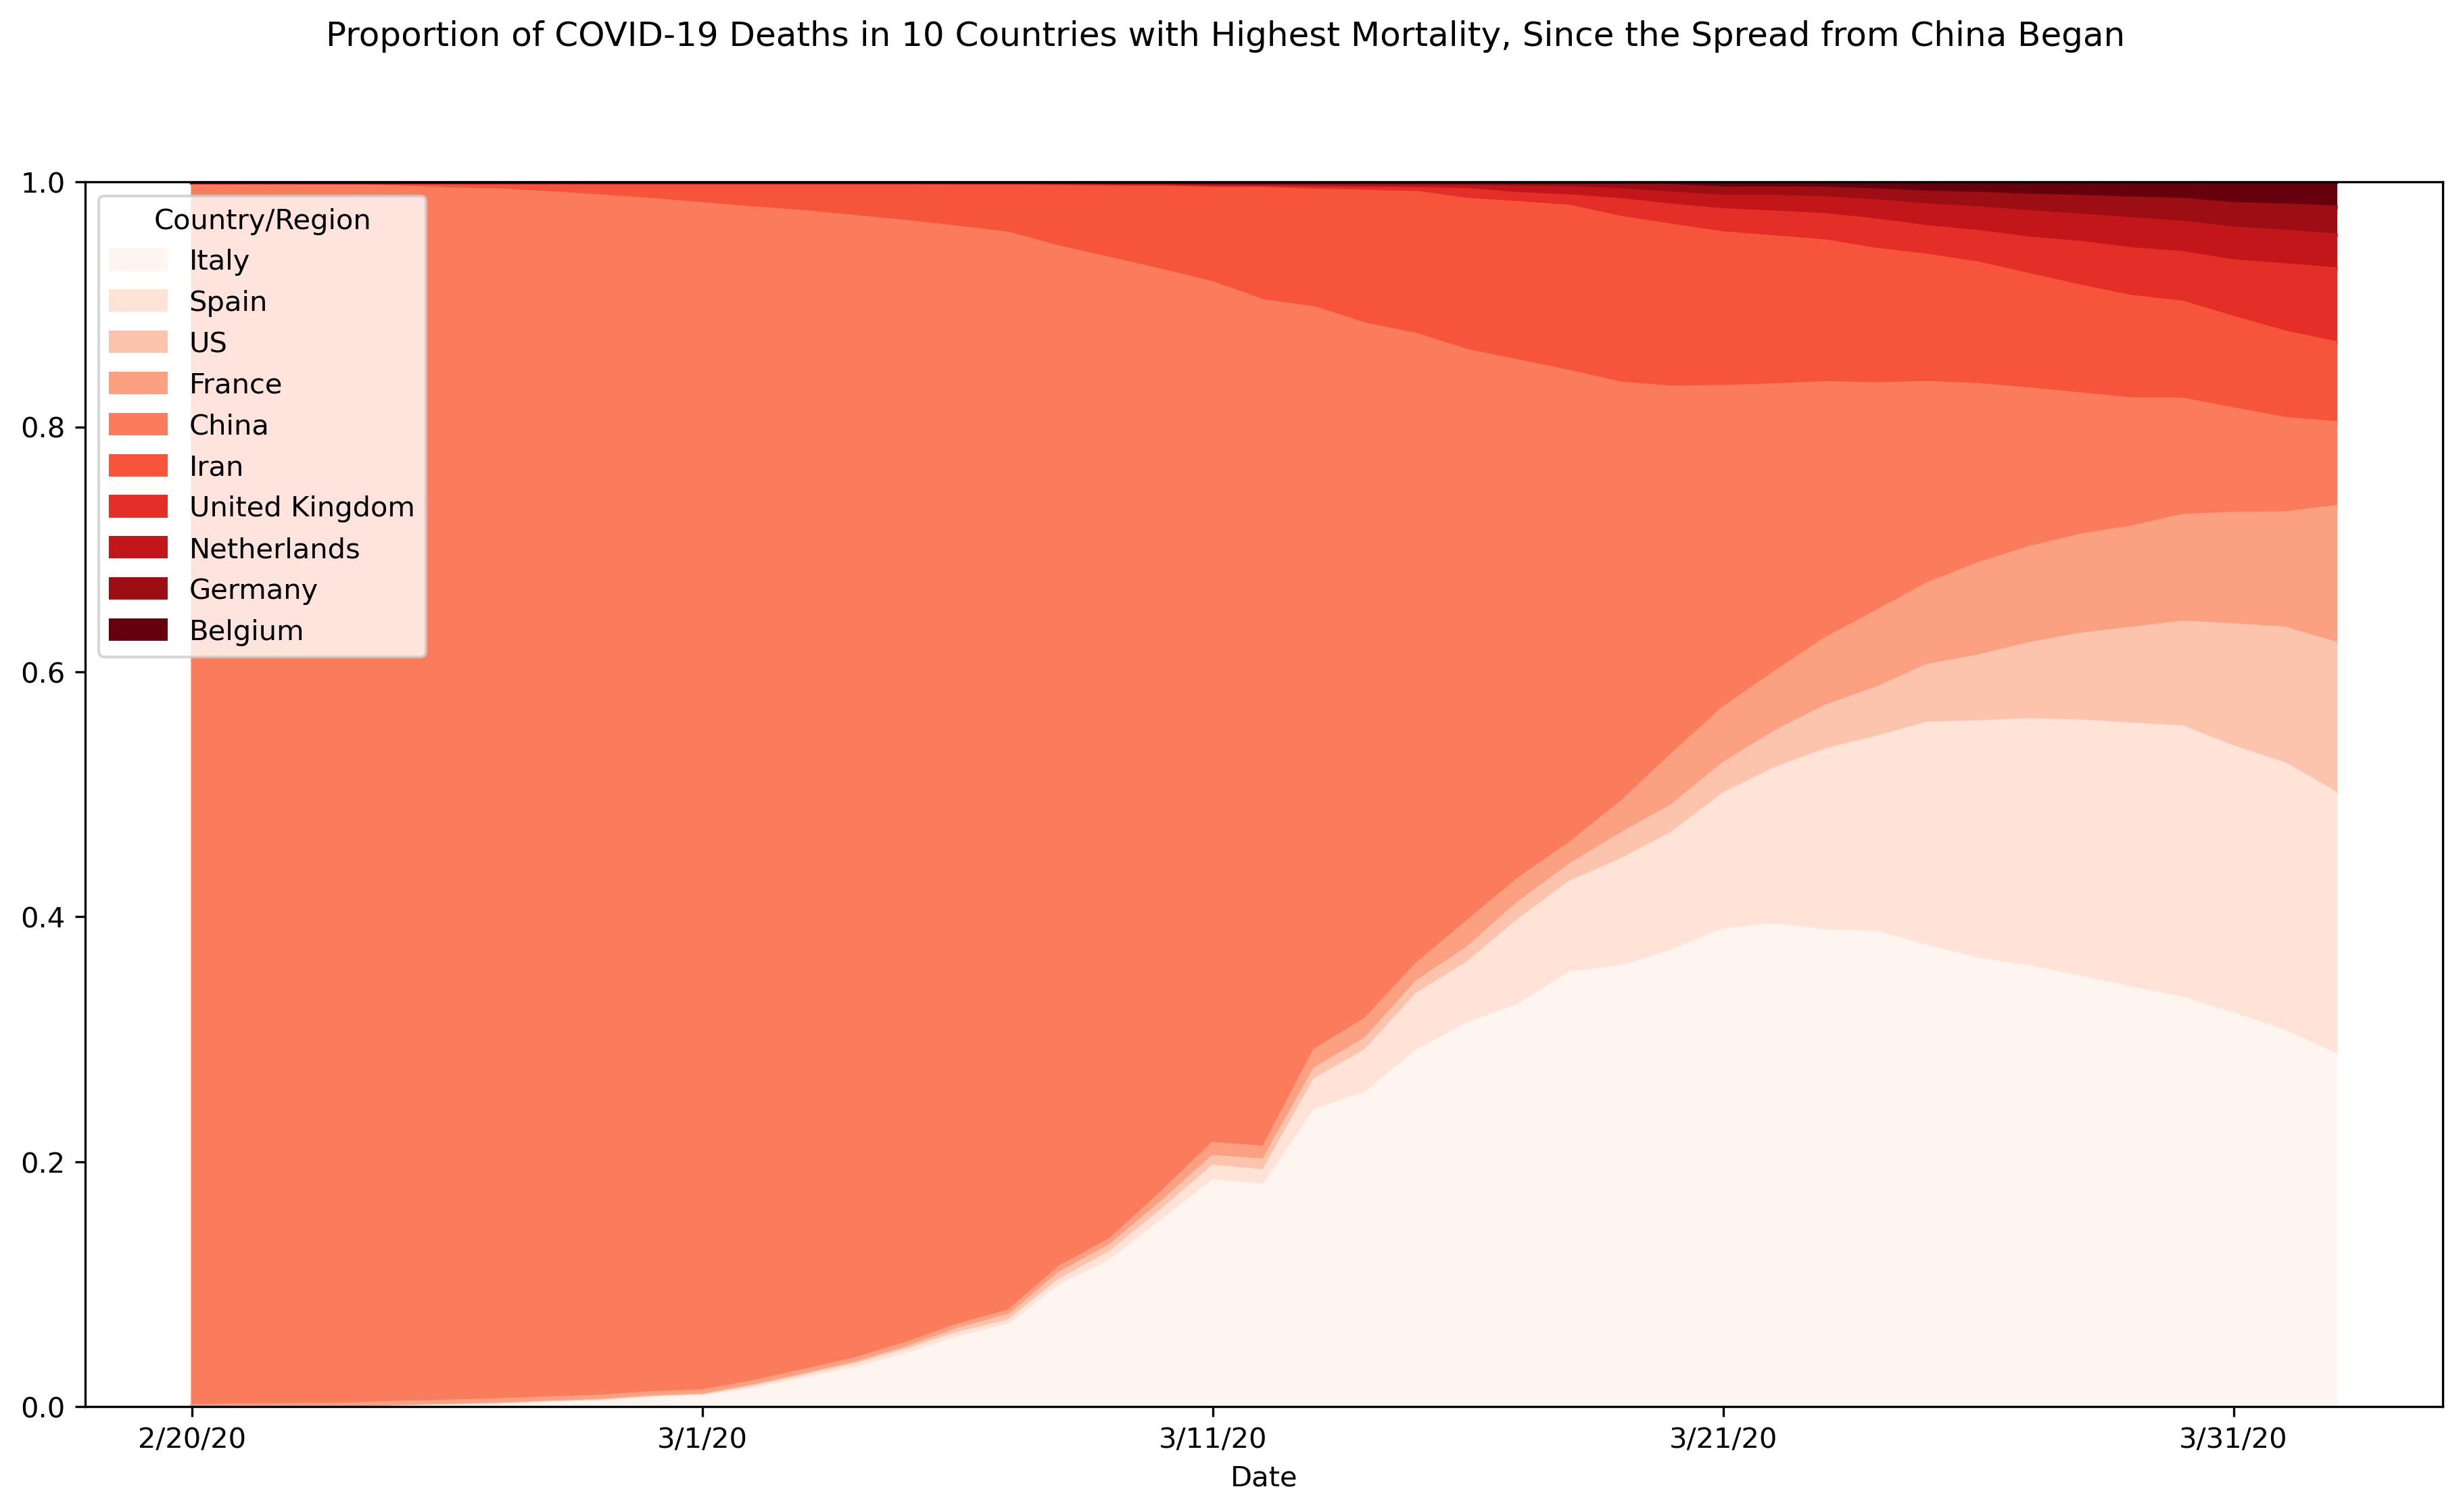

In [7]:
plt = global_death_cases_top_proportions.iloc[list(global_death_cases_top_proportions.index).index('2/20/20'):, :].plot(kind="area", figsize=(15, 8), cmap="Reds", ylim=(0,1))
plt.figure.suptitle("Proportion of COVID-19 Deaths in 10 Countries with Highest Mortality, Since the Spread from China Began")
plt.figure.set_dpi(300)
plt.set_xlabel("Date")
plt

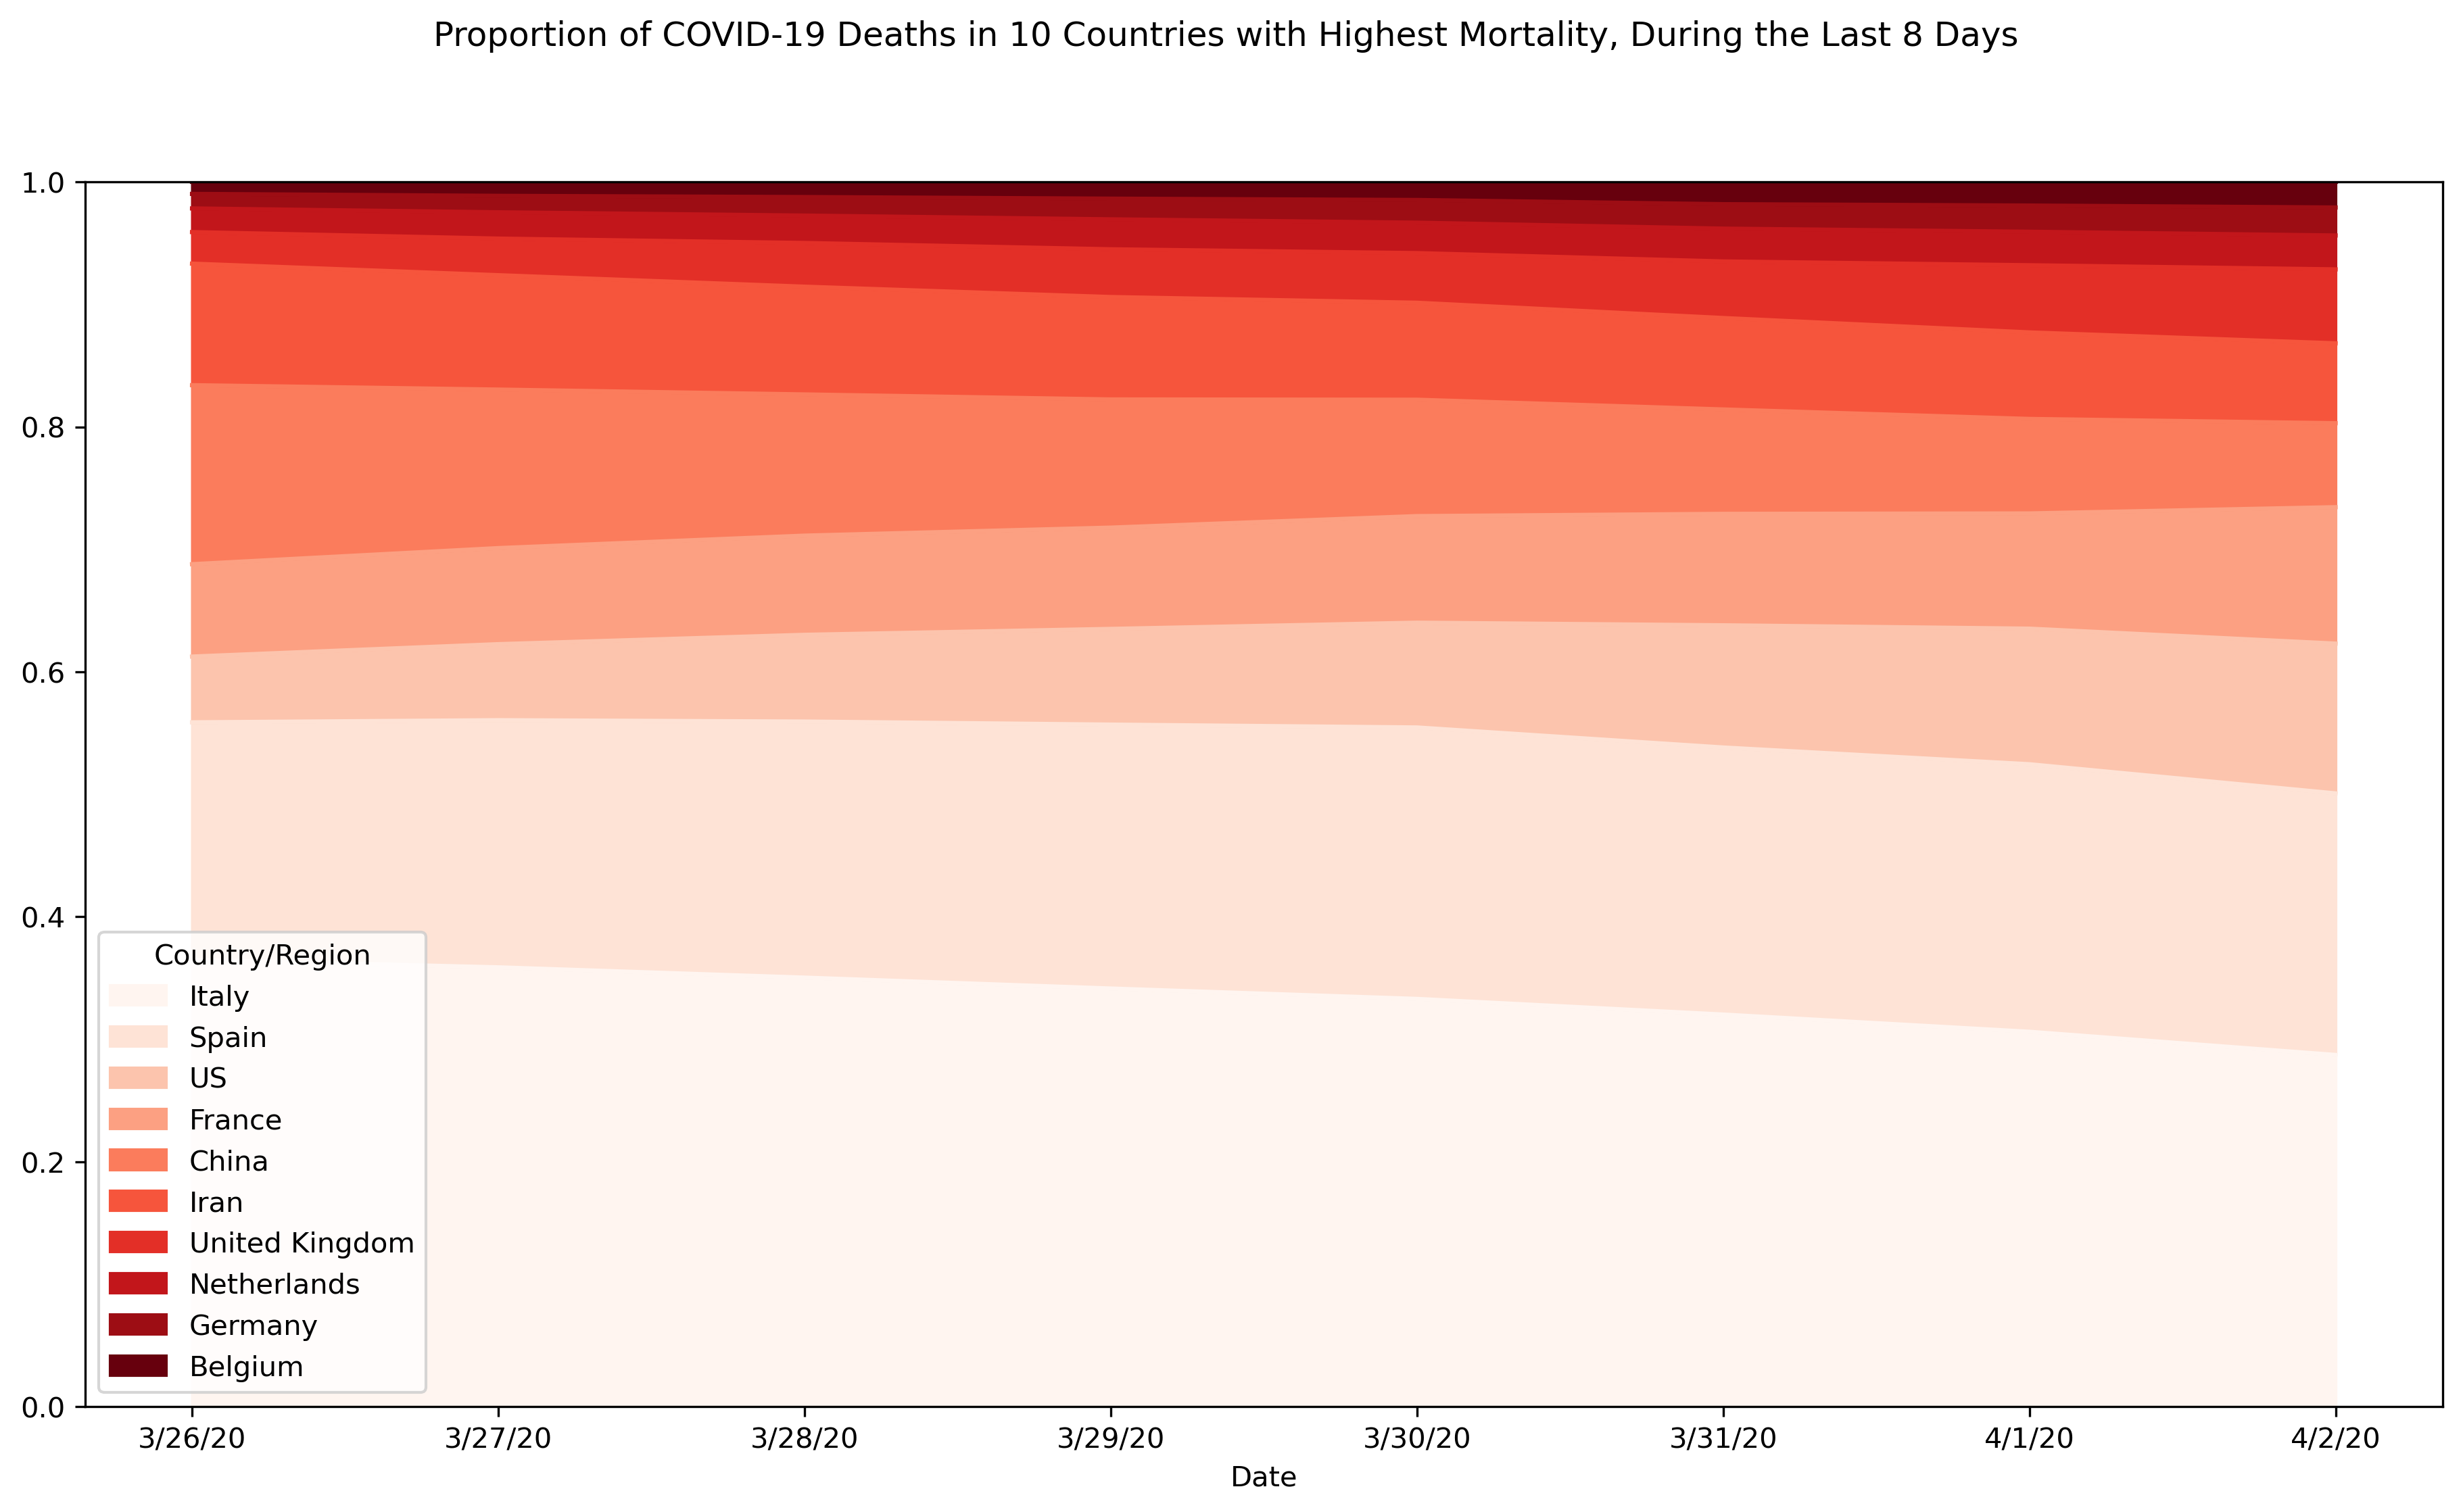

In [8]:
plt = global_death_cases_top_proportions.iloc[-8:, :].plot(kind="area", figsize=(15, 8), cmap="Reds", ylim=(0,1))
plt.figure.suptitle("Proportion of COVID-19 Deaths in 10 Countries with Highest Mortality, During the Last 8 Days")
plt.figure.set_dpi(300)
plt.set_xlabel("Date")
plt

### b.) Line graph of deaths by US state

In [9]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,1,1,1,1,1,1,1,2,3,3
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,0,0,0,0,0,0,0,0,1,1
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,2,2,2,3,3,3,6,8,11,12
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,0,0,0,0,0,0,0,0,0,0


In [10]:
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [11]:
us_deaths = us_deaths[us_deaths['Province_State'].isin(state_list)].groupby('Province_State').sum()
us_deaths.head()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,0,0,0,0,...,0,1,1,4,4,10,10,23,27,32
Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,731545,0,0,0,0,...,0,1,1,1,2,2,3,3,3,3
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,0,0,0,0,...,5,6,8,13,15,17,20,24,29,32
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,0,0,0,0,...,2,2,2,3,5,6,7,8,10,12
California,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,0,0,0,0,...,50,65,81,94,110,124,146,173,199,238


In [12]:
us_death_cases = us_deaths.iloc[:, 6:]
us_death_cases.sort_values(by=us_death_cases.columns[-1], ascending=False, inplace=True)
us_death_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,...,210,285,385,527,728,965,1218,1550,1941,2373
New Jersey,0,0,0,0,0,0,0,0,0,0,...,44,62,81,108,140,161,198,267,355,537
Michigan,0,0,0,0,0,0,0,0,0,0,...,24,43,61,92,111,132,184,259,335,417
Louisiana,0,0,0,0,0,0,0,0,0,0,...,46,65,83,119,137,151,185,239,273,310
Washington,0,0,0,0,0,0,0,0,0,0,...,116,133,150,157,188,198,205,225,234,271


In [13]:
print('All %s states are represented.' %len(us_death_cases.index))

All 50 states are represented.


In [14]:
us_death_cases_topstates = us_death_cases.T.iloc[:, 0:10]
us_death_cases_topstates.tail()

Province_State,New York,New Jersey,Michigan,Louisiana,Washington,California,Florida,Georgia,Illinois,Massachusetts
3/29/20,965,161,132,151,198,124,56,80,66,48
3/30/20,1218,198,184,185,205,146,63,87,73,56
3/31/20,1550,267,259,239,225,173,85,111,99,89
4/1/20,1941,355,335,273,234,199,87,139,141,122
4/2/20,2373,537,417,310,271,238,164,163,163,154


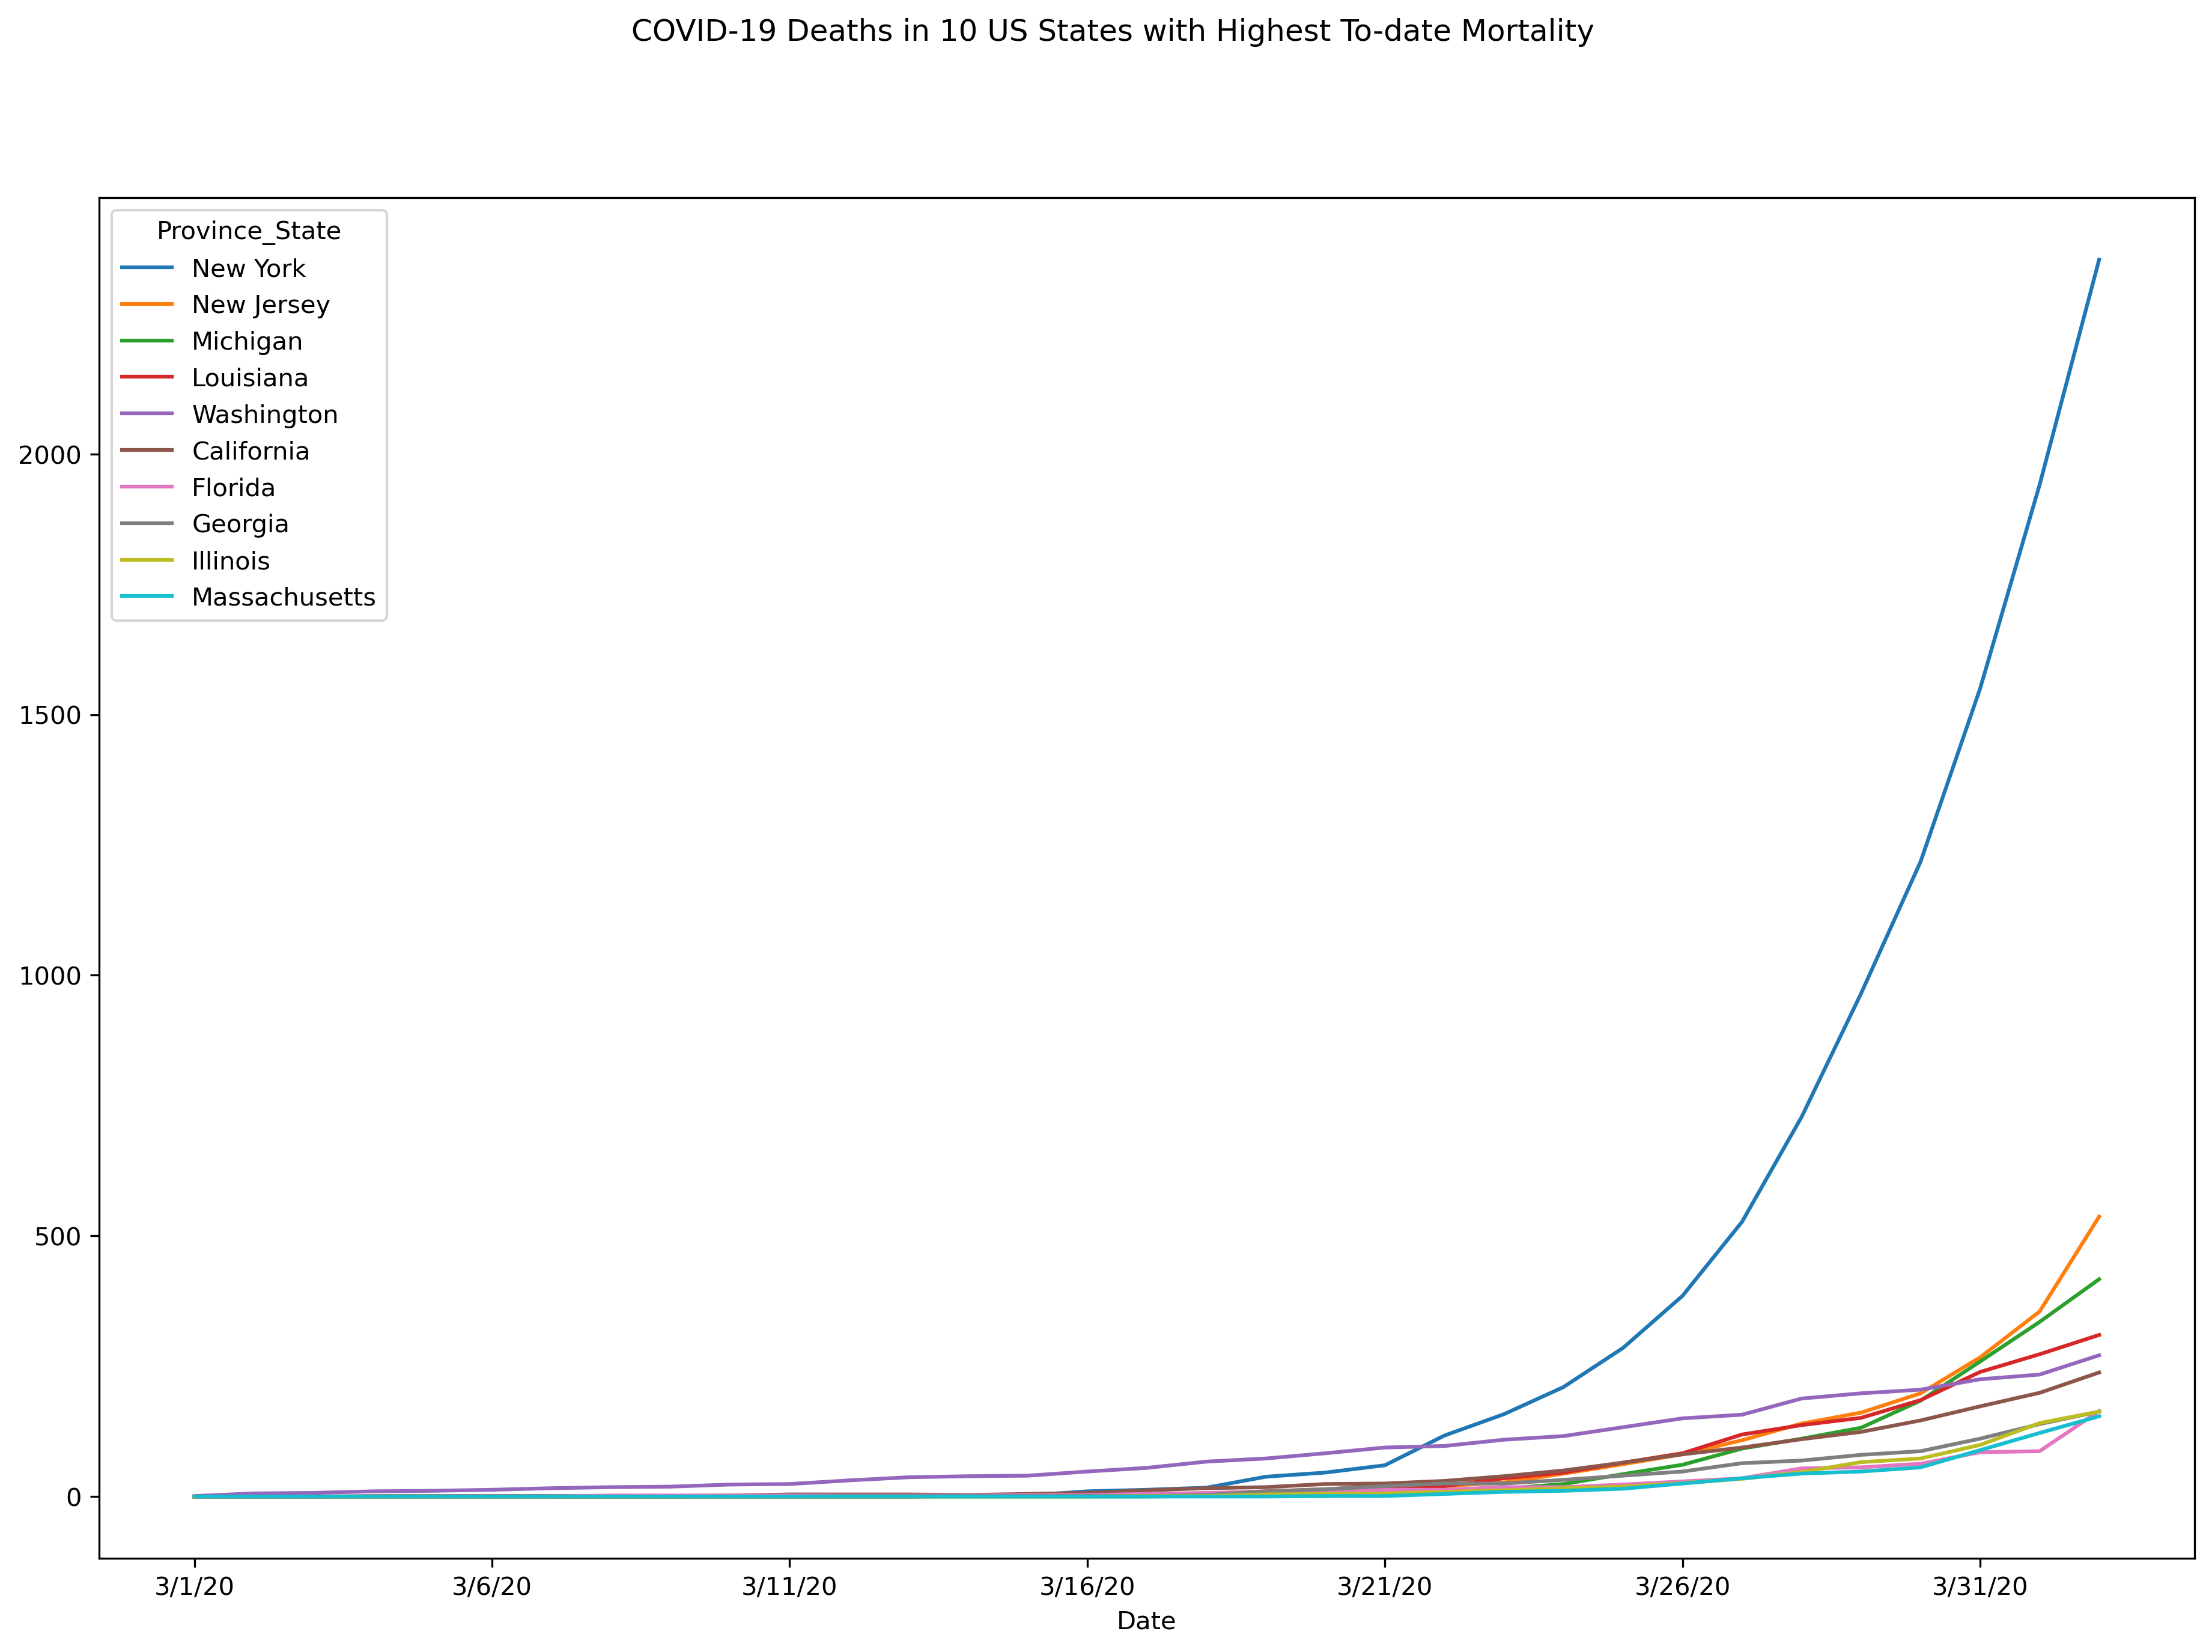

In [15]:
plt = us_death_cases_topstates.iloc[list(us_death_cases_topstates.index).index("3/1/20"):, :].plot(figsize=(15, 10))
plt.figure.suptitle("COVID-19 Deaths in 10 US States with Highest To-date Mortality")
plt.figure.set_dpi(300)
plt.set_xlabel("Date")
plt

### c.) Line graph of (confirmed - deaths) by US state

No longer any U.S. recovery data, so used death data instead

In [16]:
us_confirmed = us_confirmed[us_confirmed['Province_State'].isin(state_list)].groupby('Province_State').sum()
us_confirmed.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,0,0,0,0,0,...,242,381,517,587,694,825,899,987,1060,1233
Alaska,2604232344,26040,232344.0,1747.579877,-4229.319334,0,0,0,0,0,...,34,41,56,58,85,102,114,119,132,143
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,0,0,0,0,1,...,326,401,508,665,773,919,1157,1289,1530,1715
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,0,0,0,0,0,...,219,280,335,381,409,426,473,523,584,643
California,5040521376,50400,521376.0,2194.949775,-7002.258461,0,0,0,0,2,...,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773


In [17]:
us_confirmed_cases = us_confirmed.iloc[:, 5:]
us_confirmed_cases.sort_values(by=us_confirmed_cases.columns[-1], ascending=False, inplace=True)
us_confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,...,25681,30841,37877,44876,52410,59648,66663,75833,83948,92506
New Jersey,0,0,0,0,0,0,0,0,0,0,...,3675,4402,6876,8825,11124,13386,16636,18696,22255,25590
Michigan,0,0,0,0,0,0,0,0,0,0,...,1793,2296,2845,3634,4650,5488,6498,7615,9315,10791
California,0,0,0,0,2,2,2,2,2,3,...,2538,2998,3899,4657,5095,5852,7138,8210,9399,10773
Louisiana,0,0,0,0,0,0,0,0,0,0,...,1388,1795,2304,2744,3315,3540,4025,5237,6424,9159


In [18]:
# The resulting difference describes the number of people who are still sick or have recovered
us_confirmed_minus_deaths = pd.DataFrame(us_confirmed_cases.values - us_death_cases.values, index=us_confirmed_cases.index, columns=us_confirmed_cases.columns)
us_confirmed_minus_deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Province_State,,,,,,,,,,,,,,,,,,,,,
New York,0,0,0,0,0,0,0,0,0,0,...,25471,30556,37492,44349,51682,58683,65445,74283,82007,90133
New Jersey,0,0,0,0,0,0,0,0,0,0,...,3631,4340,6795,8717,10984,13225,16438,18429,21900,25053
Michigan,0,0,0,0,0,0,0,0,0,0,...,1769,2253,2784,3542,4539,5356,6314,7356,8980,10374
California,0,0,0,0,2,2,2,2,2,3,...,2492,2933,3816,4538,4958,5701,6953,7971,9126,10463
Louisiana,0,0,0,0,0,0,0,0,0,0,...,1272,1662,2154,2587,3127,3342,3820,5012,6190,8888


In [19]:
us_confirmed_minus_deaths_topstates = us_confirmed_minus_deaths.T.iloc[:, 0:10]
us_confirmed_minus_deaths_topstates.tail()

Province_State,New York,New Jersey,Michigan,California,Louisiana,Florida,Massachusetts,Illinois,Pennsylvania,Washington
3/29/20,58683,13225,5356,5701,3342,4122,4899,4516,3366,4417
3/30/20,65445,16438,6314,6953,3820,5327,5689,4969,4082,4867
3/31/20,74283,18429,7356,7971,5012,6568,6535,5883,4864,5343
4/1/20,82007,21900,8980,9126,6190,6757,7651,6841,5868,5486
4/2/20,90133,25053,10374,10463,8888,8770,8802,7532,7105,6235


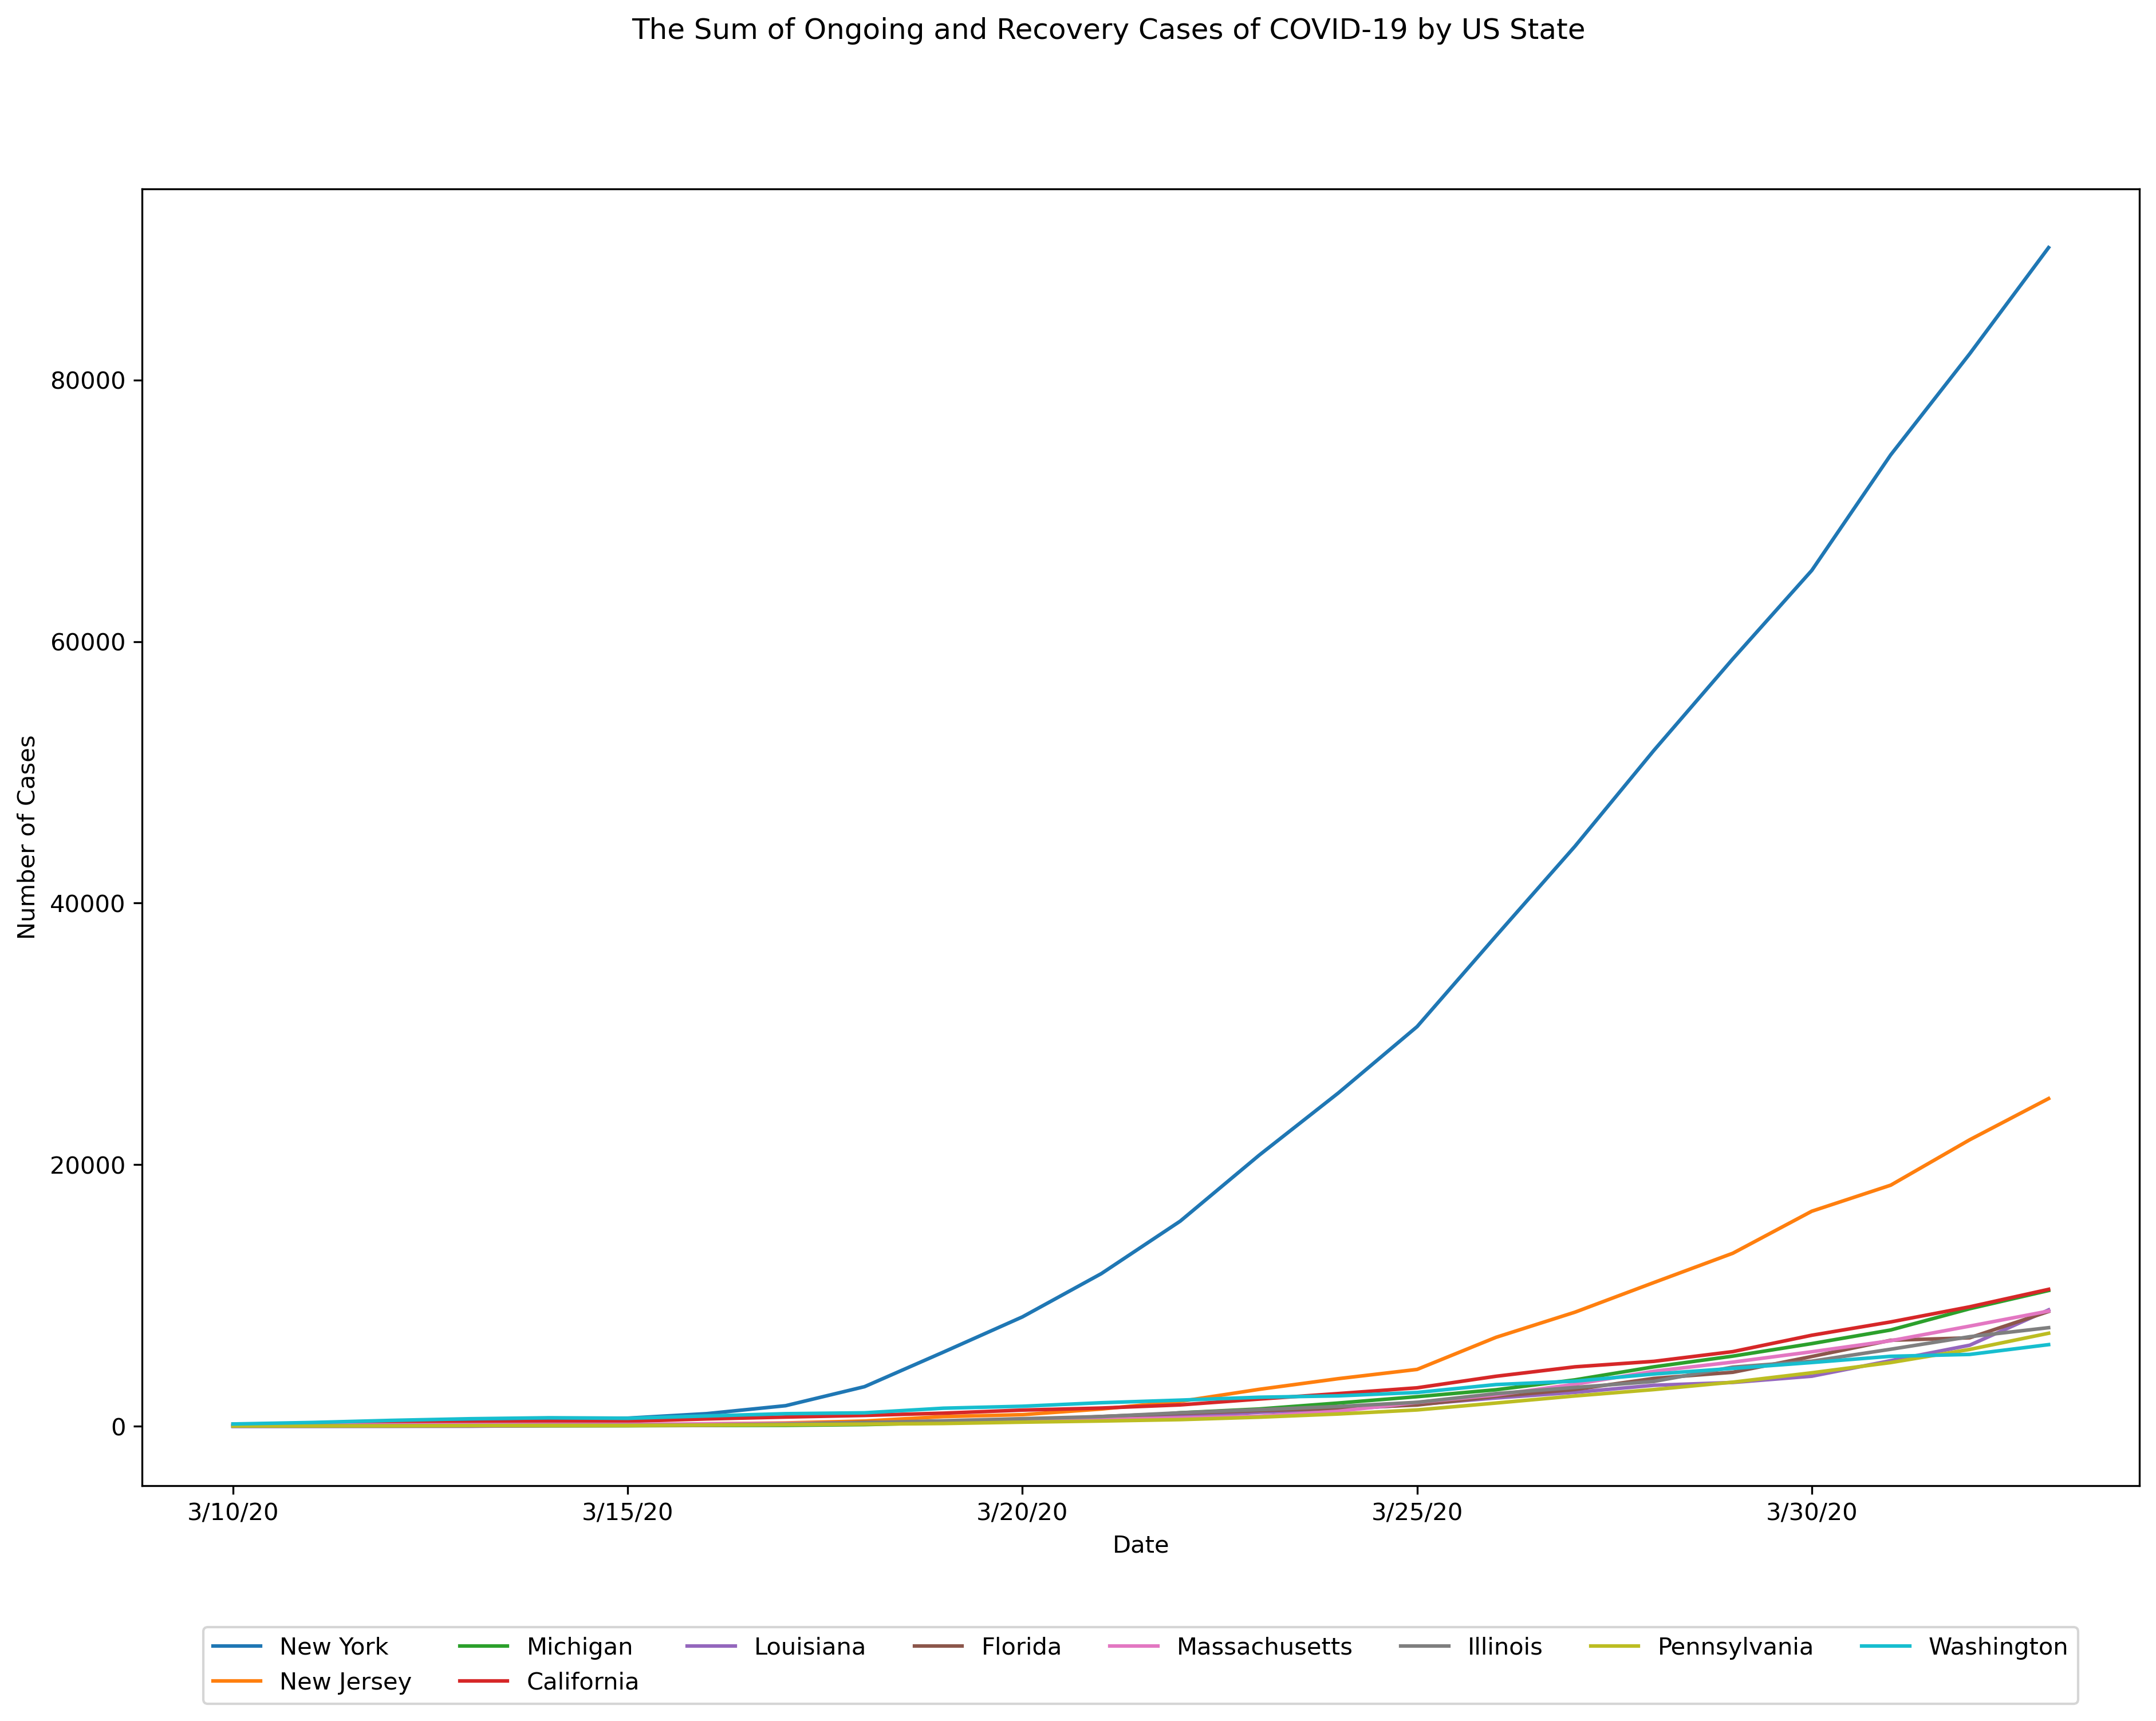

In [20]:
plt = us_confirmed_minus_deaths_topstates.iloc[list(us_confirmed_minus_deaths_topstates.index).index("3/10/20"):, :].plot(figsize=(15, 10))
plt.figure.suptitle("The Sum of Ongoing and Recovery Cases of COVID-19 by US State")
plt.figure.set_dpi(300)
plt.set_xlabel("Date")
plt.set_ylabel("Number of Cases")
plt.legend(
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.1),
    ncol=8)
plt

## 2. Days with greatest increase in confirmed cases

### a.) By country

In [21]:
def greatest_day_increase(row_values, col_names):
    diff_value_colind = (0,0,0)
    for ind, value in enumerate(row_values):
        if ind == 0:
            continue
        elif (value - row_values[ind - 1]) > diff_value_colind[0]:
            #difference, value, column index
            diff_value_colind = [value - row_values[ind - 1], value, ind]
    return(diff_value_colind)

In [22]:
def plot_line_with_gsdi(dataframe, title=str, print_summary=bool):
    """Plot a line graph showing the greatest single-day increase in cases"""
    plt = dataframe.T.plot(figsize=(15, 10))
    plt.figure.suptitle(title)
    plt.figure.set_dpi(300)
    plt.set_xlabel("Date")
    plt.set_ylabel("Number of Cases")
    plt.legend(
        loc="upper center", 
        bbox_to_anchor=(0.5, -0.1),
        ncol=8)
    # For every row, plot points marking the day of greatest case growth
    greatest_growth = (0, 0, 0)
    for i in range(dataframe.shape[0]):
        diff_value_colind = greatest_day_increase(dataframe.iloc[i, :], dataframe.columns)
        if diff_value_colind[0] > 0:
            plt.plot(diff_value_colind[2], diff_value_colind[1], marker="o", color="r")
        if diff_value_colind[0] > greatest_growth[0]:
            greatest_growth = diff_value_colind
            greatest_growth.append(i)

    if print_summary == True:
        print("\nGreatest Single-Day Growth: %s cases\nLocation: %s\nDate: %s\n" 
              %(greatest_growth[0].round(0),
                dataframe.index[greatest_growth[3]], 
                dataframe.columns[greatest_growth[2]]))
    plt

In [23]:
global_confirmed = global_confirmed.groupby("Country/Region").sum()
global_confirmed_cases = global_confirmed.iloc[:, 2:]
global_confirmed_cases.sort_values(by=global_confirmed_cases.columns[-1], ascending=False, inplace=True)
global_confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,53740,65778,83836,101657,121478,140886,161807,188172,213372,243453
Italy,0,0,0,0,0,0,0,0,0,2,...,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242
Spain,0,0,0,0,0,0,0,0,0,0,...,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065
Germany,0,0,0,0,0,1,4,4,4,5,...,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,81591,81661,81782,81897,81999,82122,82198,82279,82361,82432



Greatest Single-Day Growth: 30081 cases
Location: US
Date: 4/2/20



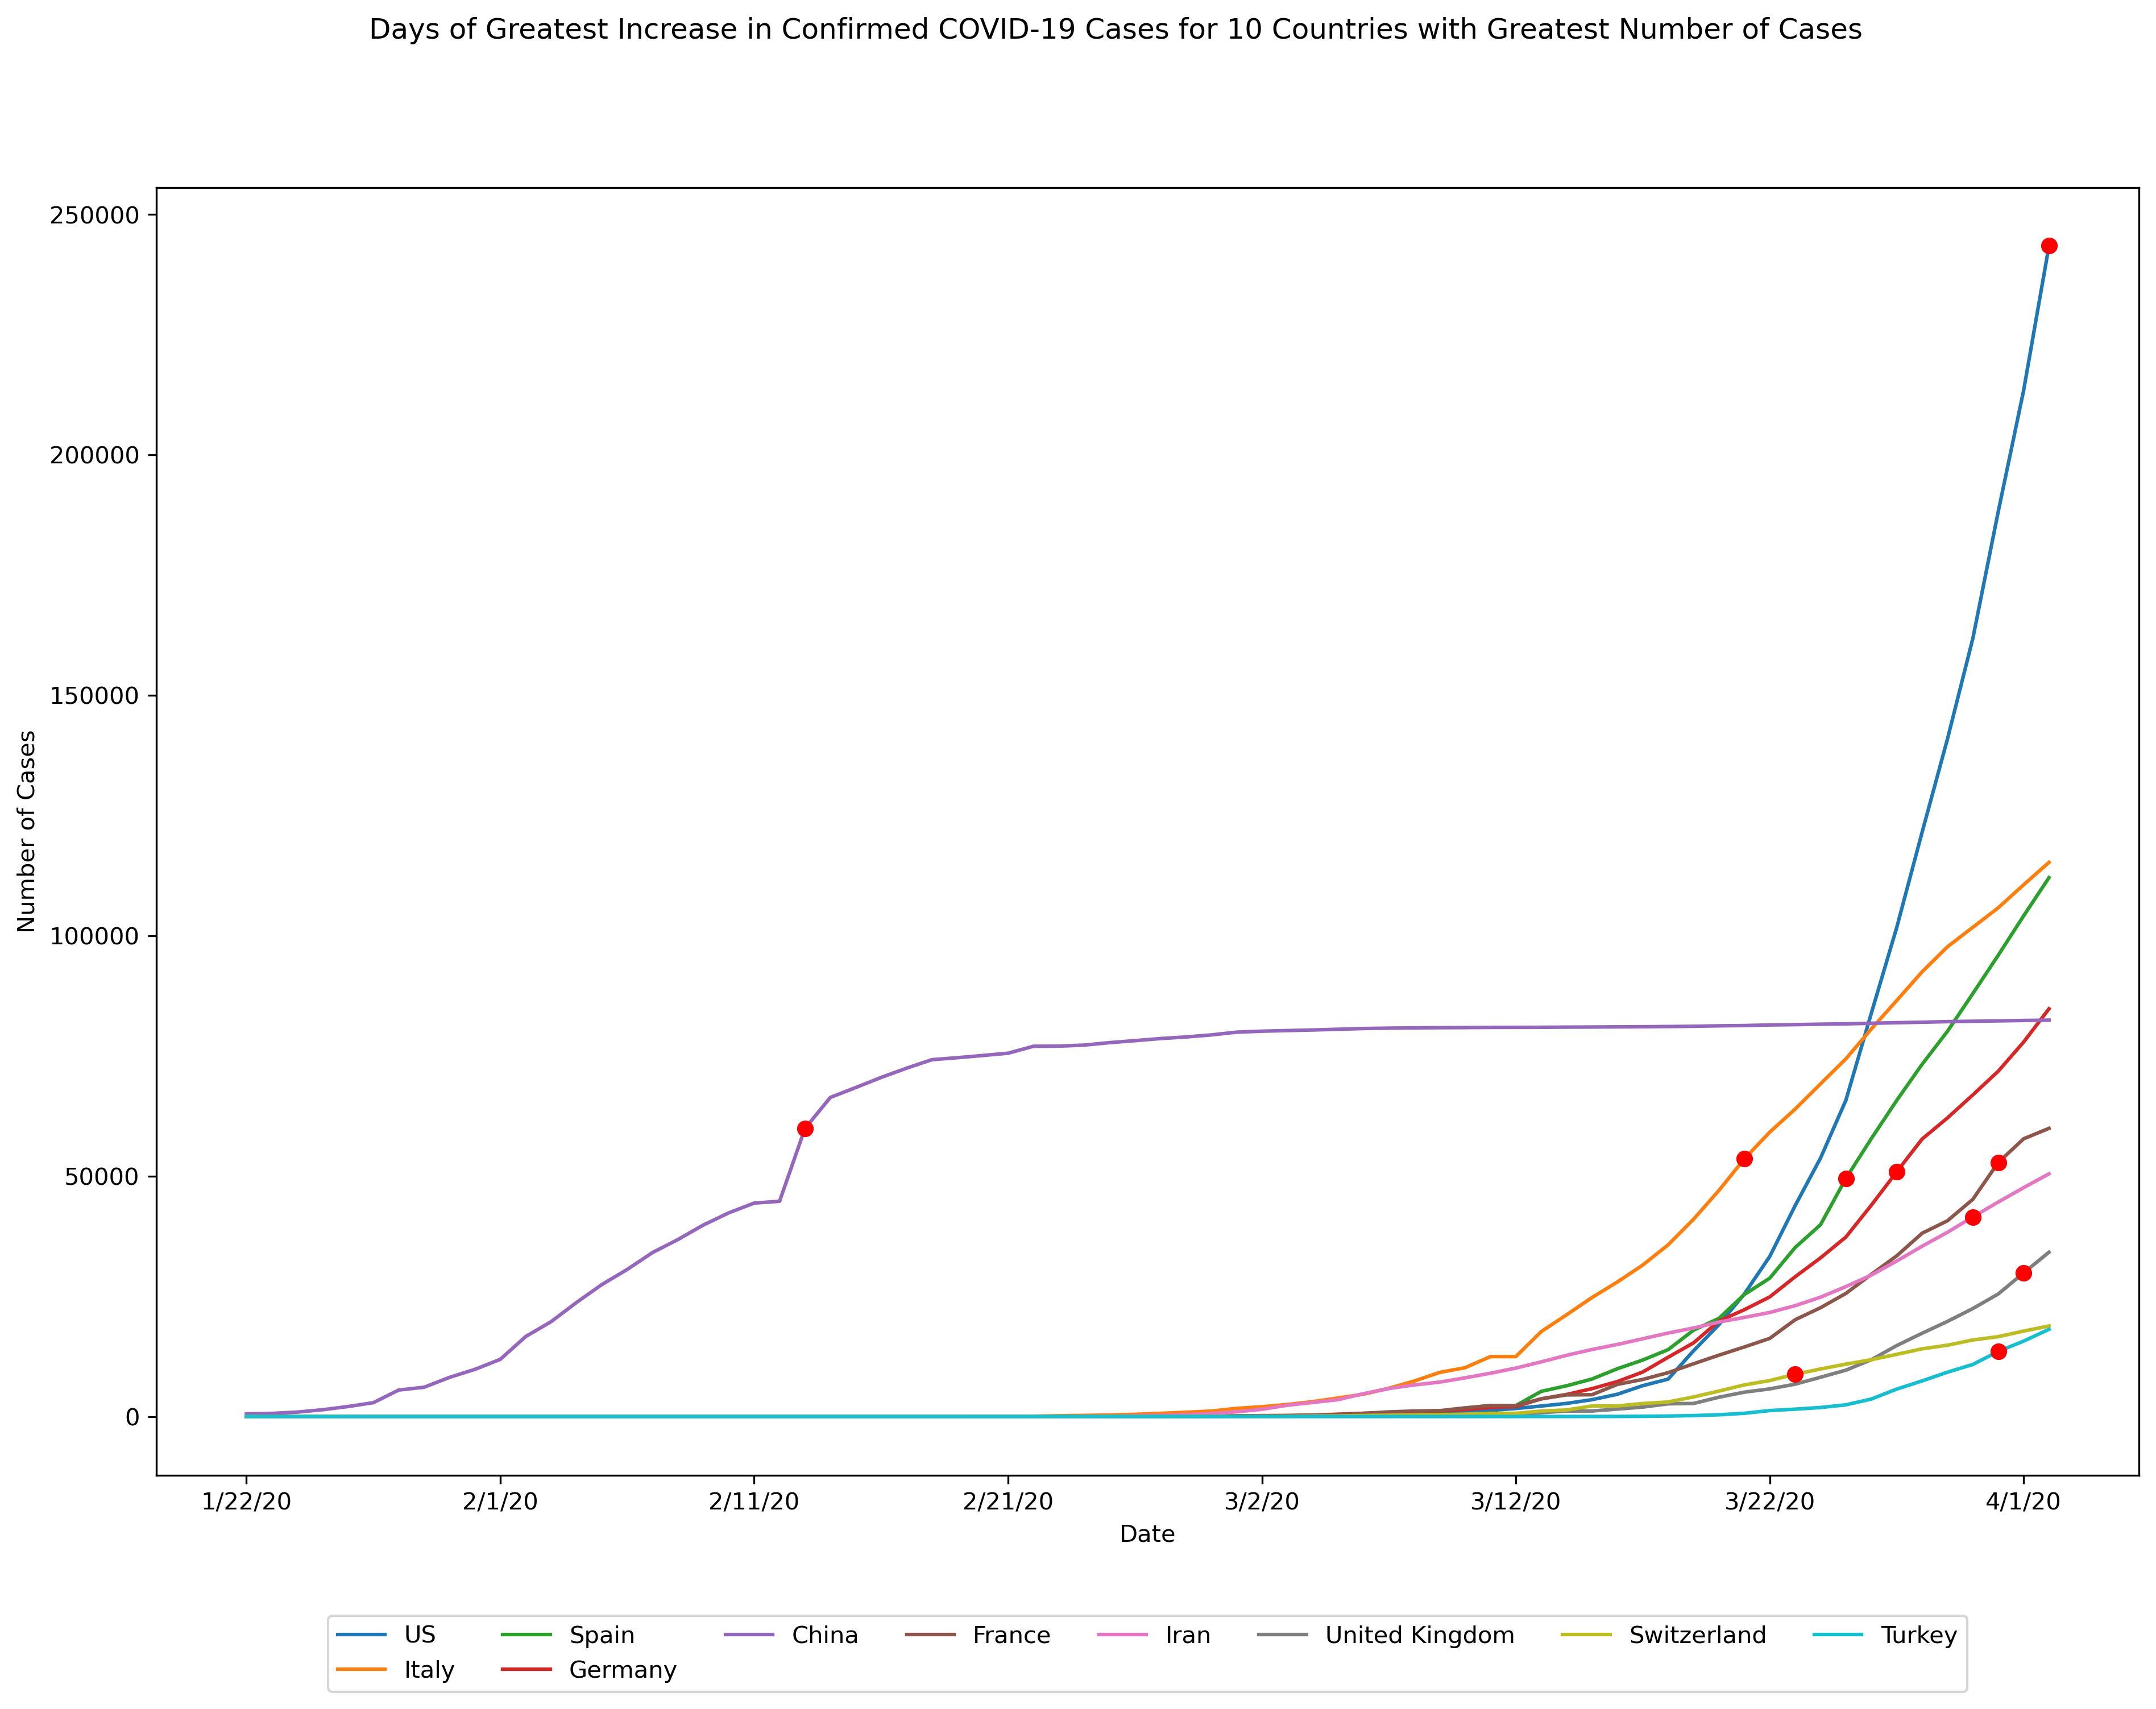

In [24]:
plot_line_with_gsdi(dataframe=global_confirmed_cases.head(10),
                    title="Days of Greatest Increase in Confirmed COVID-19 Cases for 10 Countries with Greatest Number of Cases",
                    print_summary=True)

### b.) By US state


Greatest Single-Day Growth: 9170 cases
Location: New York
Date: 3/31/20



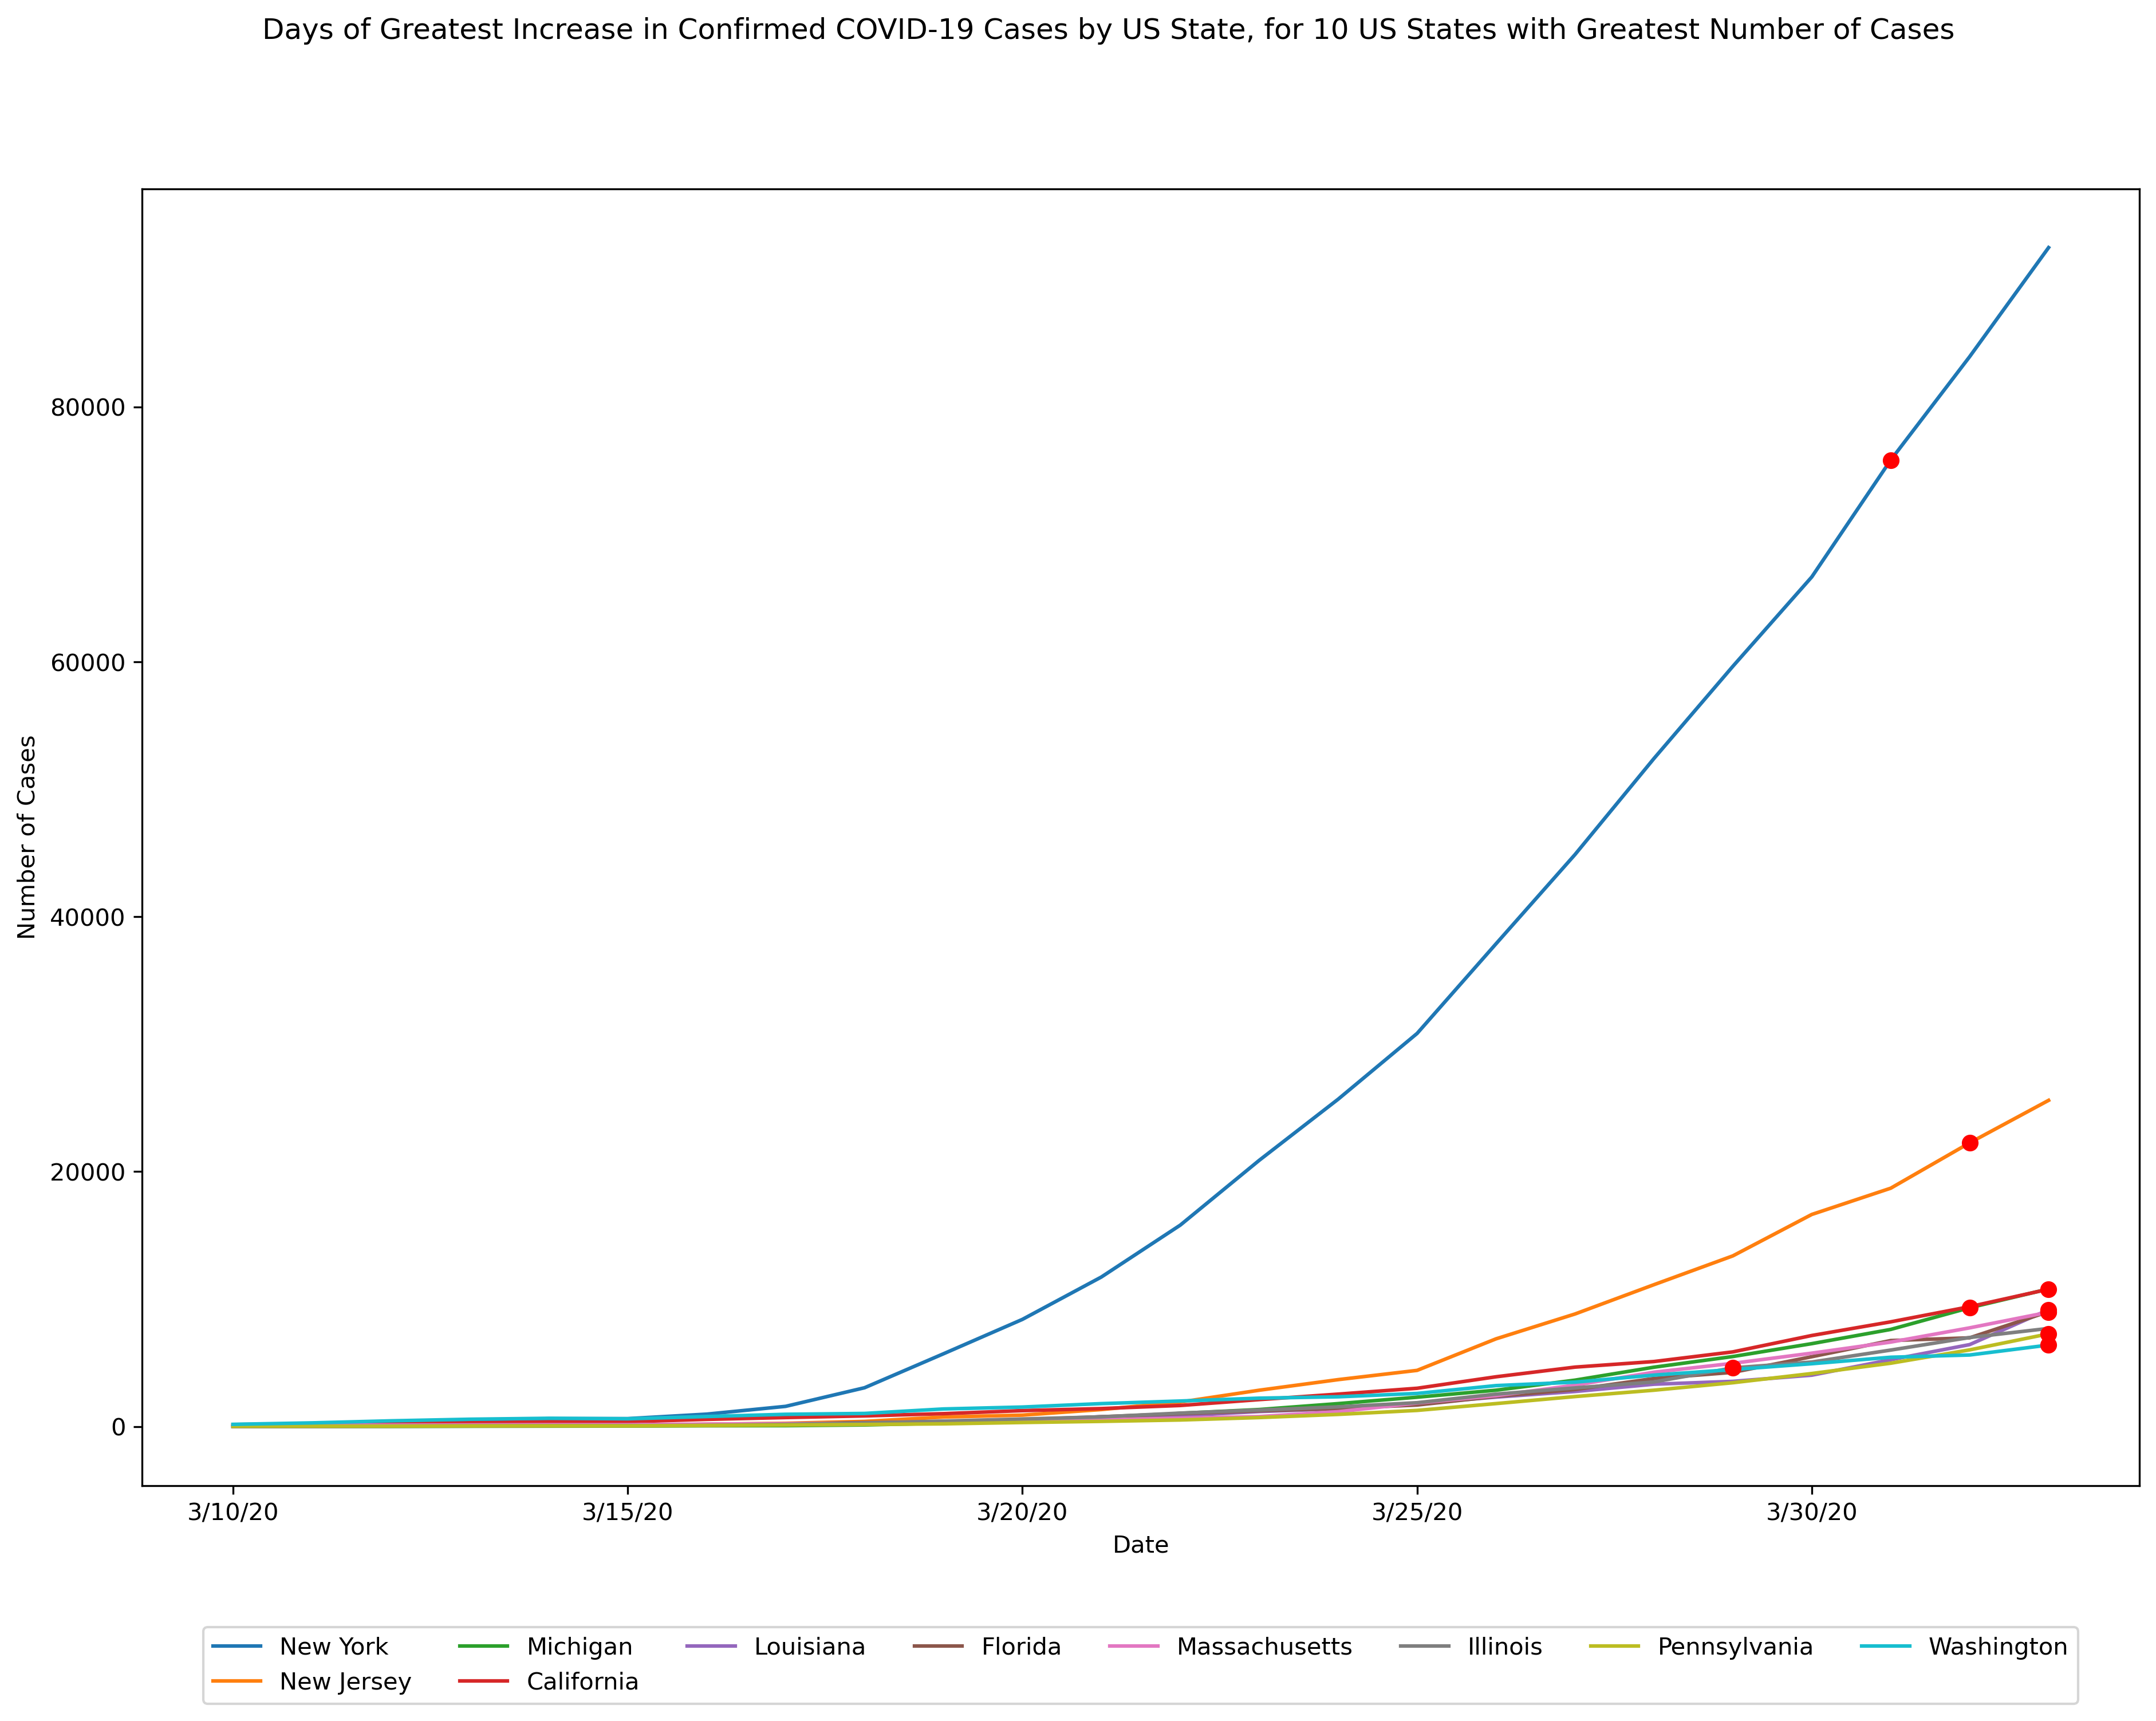

In [25]:
plot_line_with_gsdi(dataframe=us_confirmed_cases.head(10).iloc[:, list(us_confirmed_cases.columns).index("3/10/20"):],
                    title="Days of Greatest Increase in Confirmed COVID-19 Cases by US State, for 10 US States with Greatest Number of Cases",
                    print_summary=True)

## 3. Geographical Associations

### a.) Deaths vs population in  US states

In [26]:
state_population_and_cases = pd.DataFrame([us_deaths.iloc[:, -1], us_deaths['Population']]).T
state_population_and_cases.sort_values(by=us_deaths.columns[-1], ascending=True, inplace=True)
state_population_and_cases.head()

,4/2/20,Population
Province_State,,
Wyoming,0,578759
Hawaii,1,1415872
West Virginia,2,1792147
South Dakota,2,884659
New Hampshire,3,1359711


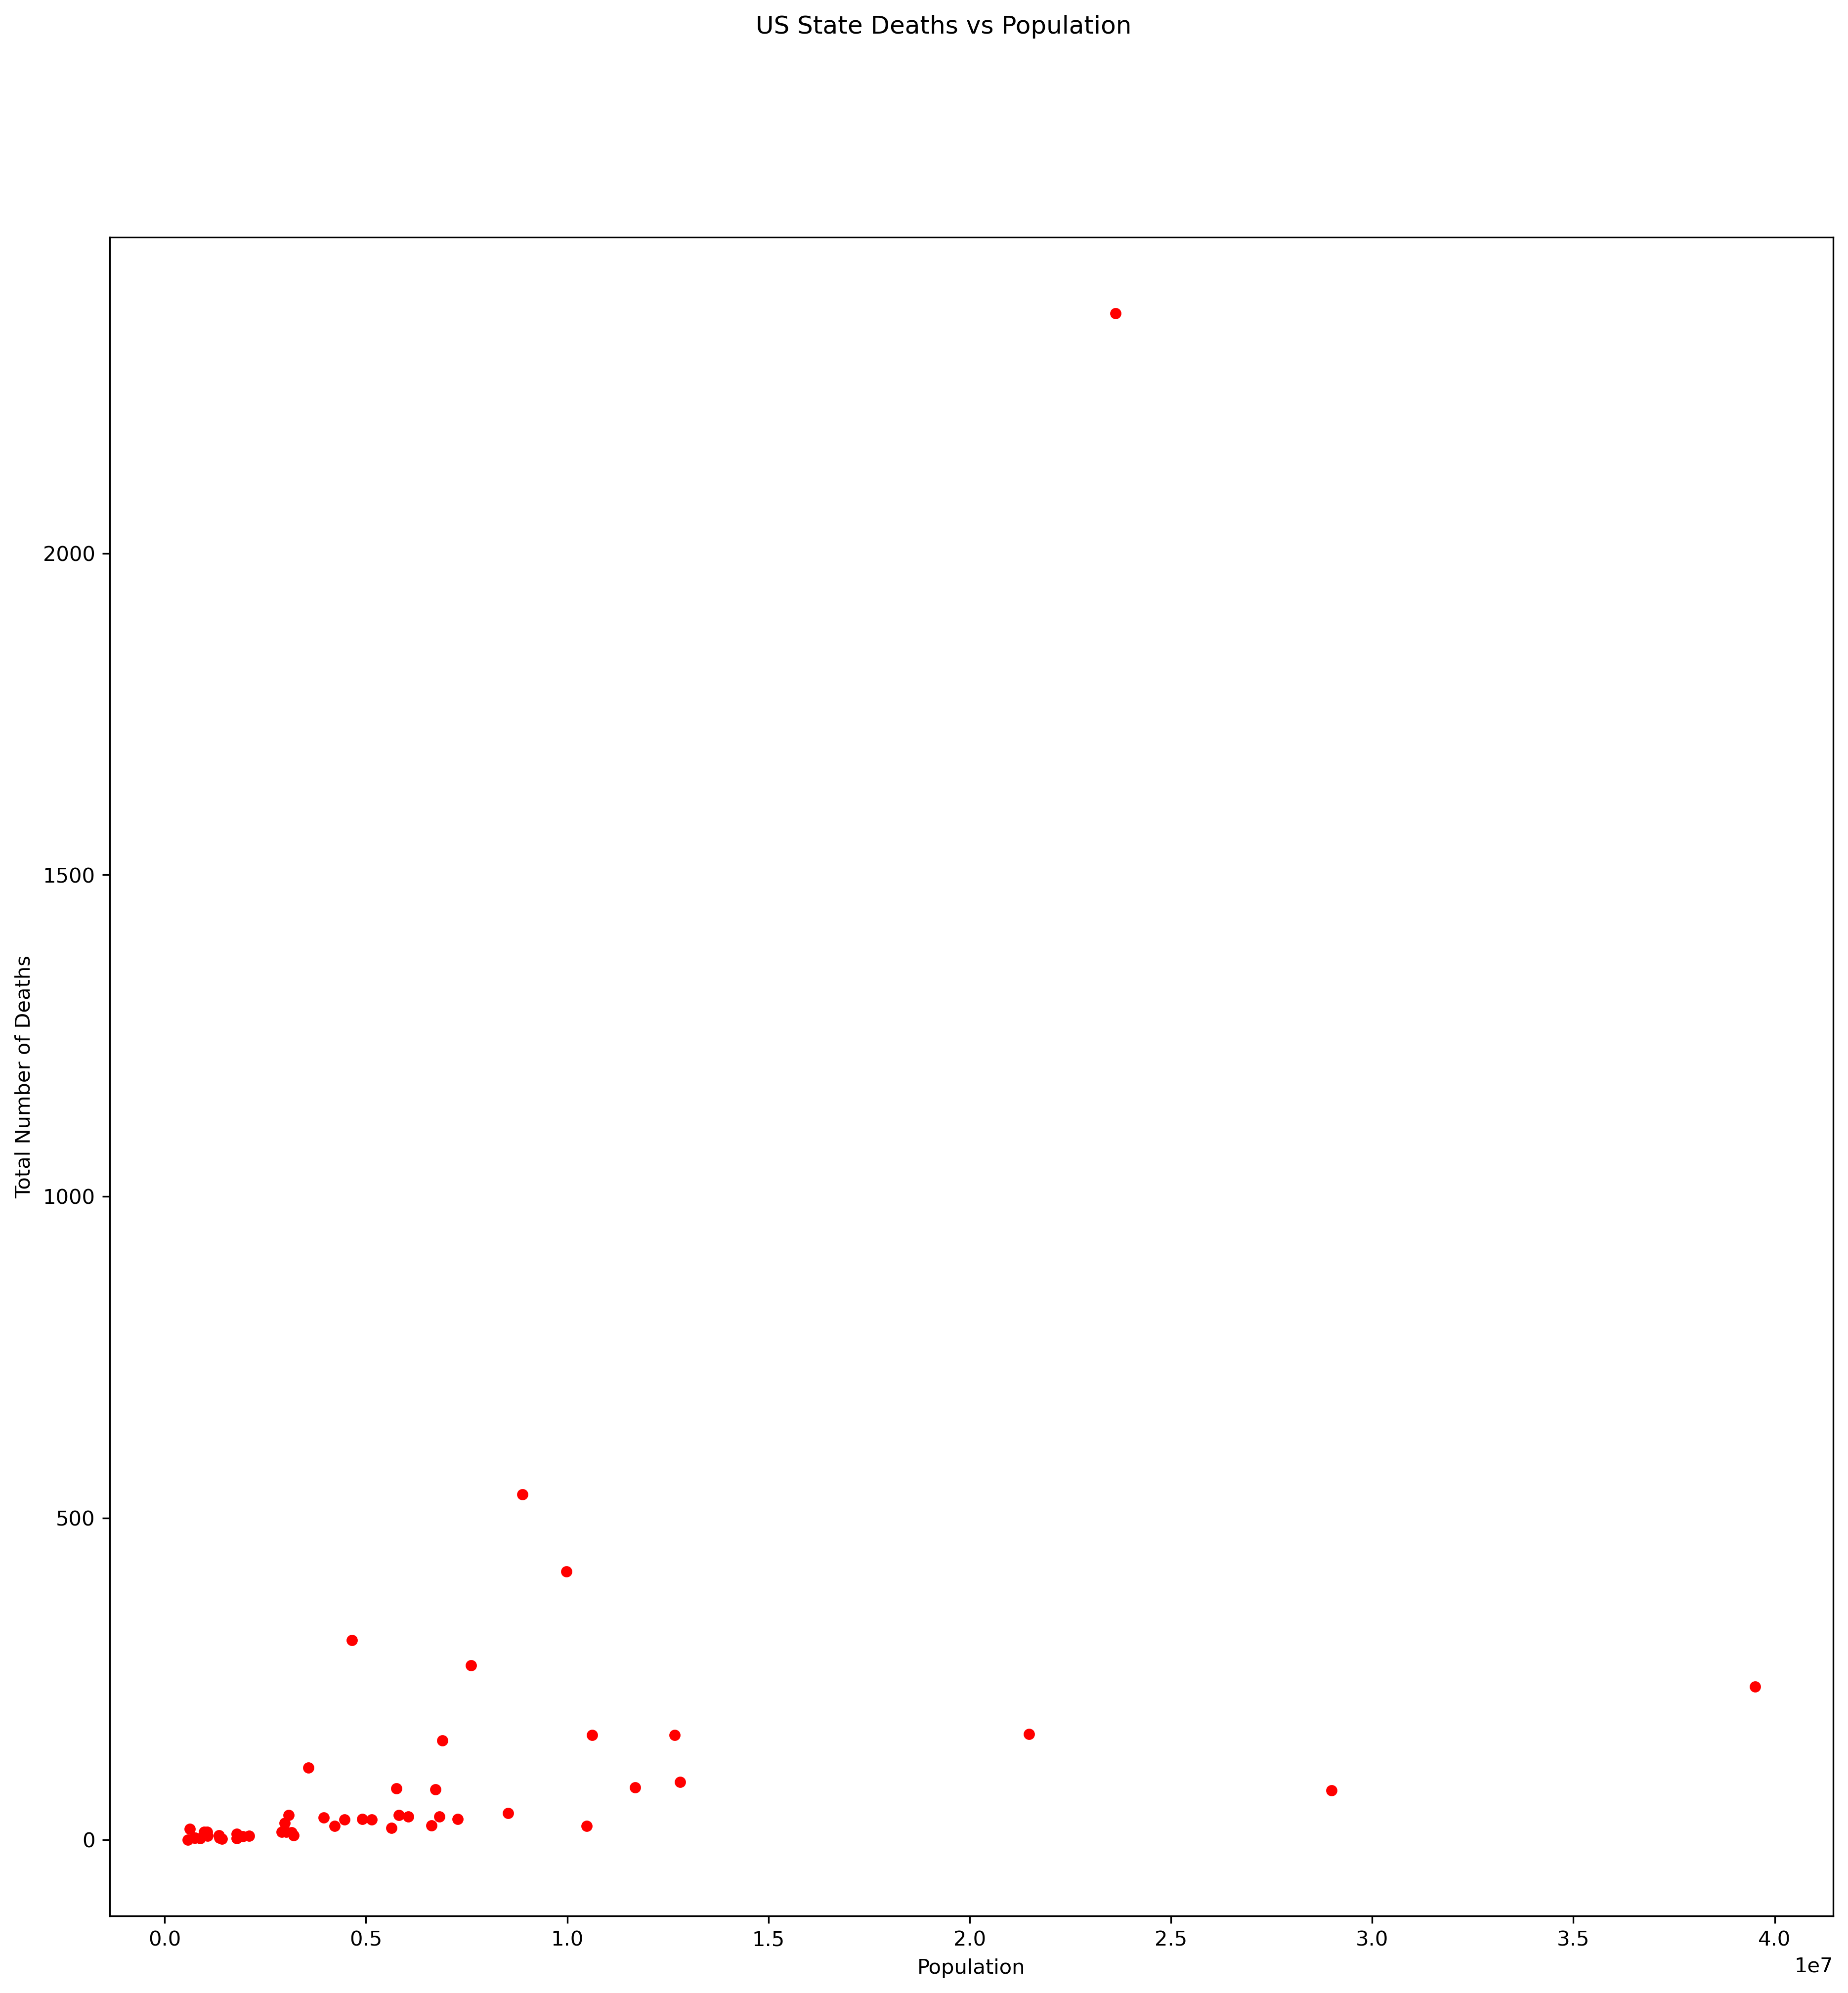

In [27]:
plt = state_population_and_cases.plot(x=1, y=0, figsize=(15,15), kind='scatter', c='r')
plt.figure.suptitle("US State Deaths vs Population")
plt.figure.set_dpi(300)
plt.set_ylabel("Total Number of Deaths")
plt

### b.) Cartogram of confirmed cases by US state

Based on the example provided [here](https://residentmario.github.io/geoplot/gallery/plot_obesity.html#sphx-glr-gallery-plot-obesity-py)

In [28]:
latest_us_confirmed = us_confirmed_cases.iloc[:, -1].reset_index()
latest_us_confirmed.columns = ['State', 'Confirmed Cases']
latest_us_confirmed['Confirmed Cases Percent'] = latest_us_confirmed['Confirmed Cases'].div(latest_us_confirmed['Confirmed Cases'].sum(), axis='index').multiply(100)
latest_us_confirmed = latest_us_confirmed[~latest_us_confirmed['State'].isin(['Alaska', 'Hawaii'])]
latest_us_confirmed.head()

,State,Confirmed Cases,Confirmed Cases Percent
0,New York,92506,38.191847
1,New Jersey,25590,10.565038
2,Michigan,10791,4.455151
3,California,10773,4.447720
4,Louisiana,9159,3.781367


In [29]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
contiguous_usa = contiguous_usa[contiguous_usa['state'] != 'District of Columbia']
contiguous_usa.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [30]:
contiguous_usa['Confirmed Cases Percent'] = contiguous_usa['state'].map(
    lambda state: round(latest_us_confirmed.query("State == @state").iloc[0]['Confirmed Cases Percent'], 1)
)
contiguous_usa.head()

,state,adm1_code,population,geometry,Confirmed Cases Percent
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",0.3
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",0.1
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",0.1
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",0.3
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",2.6


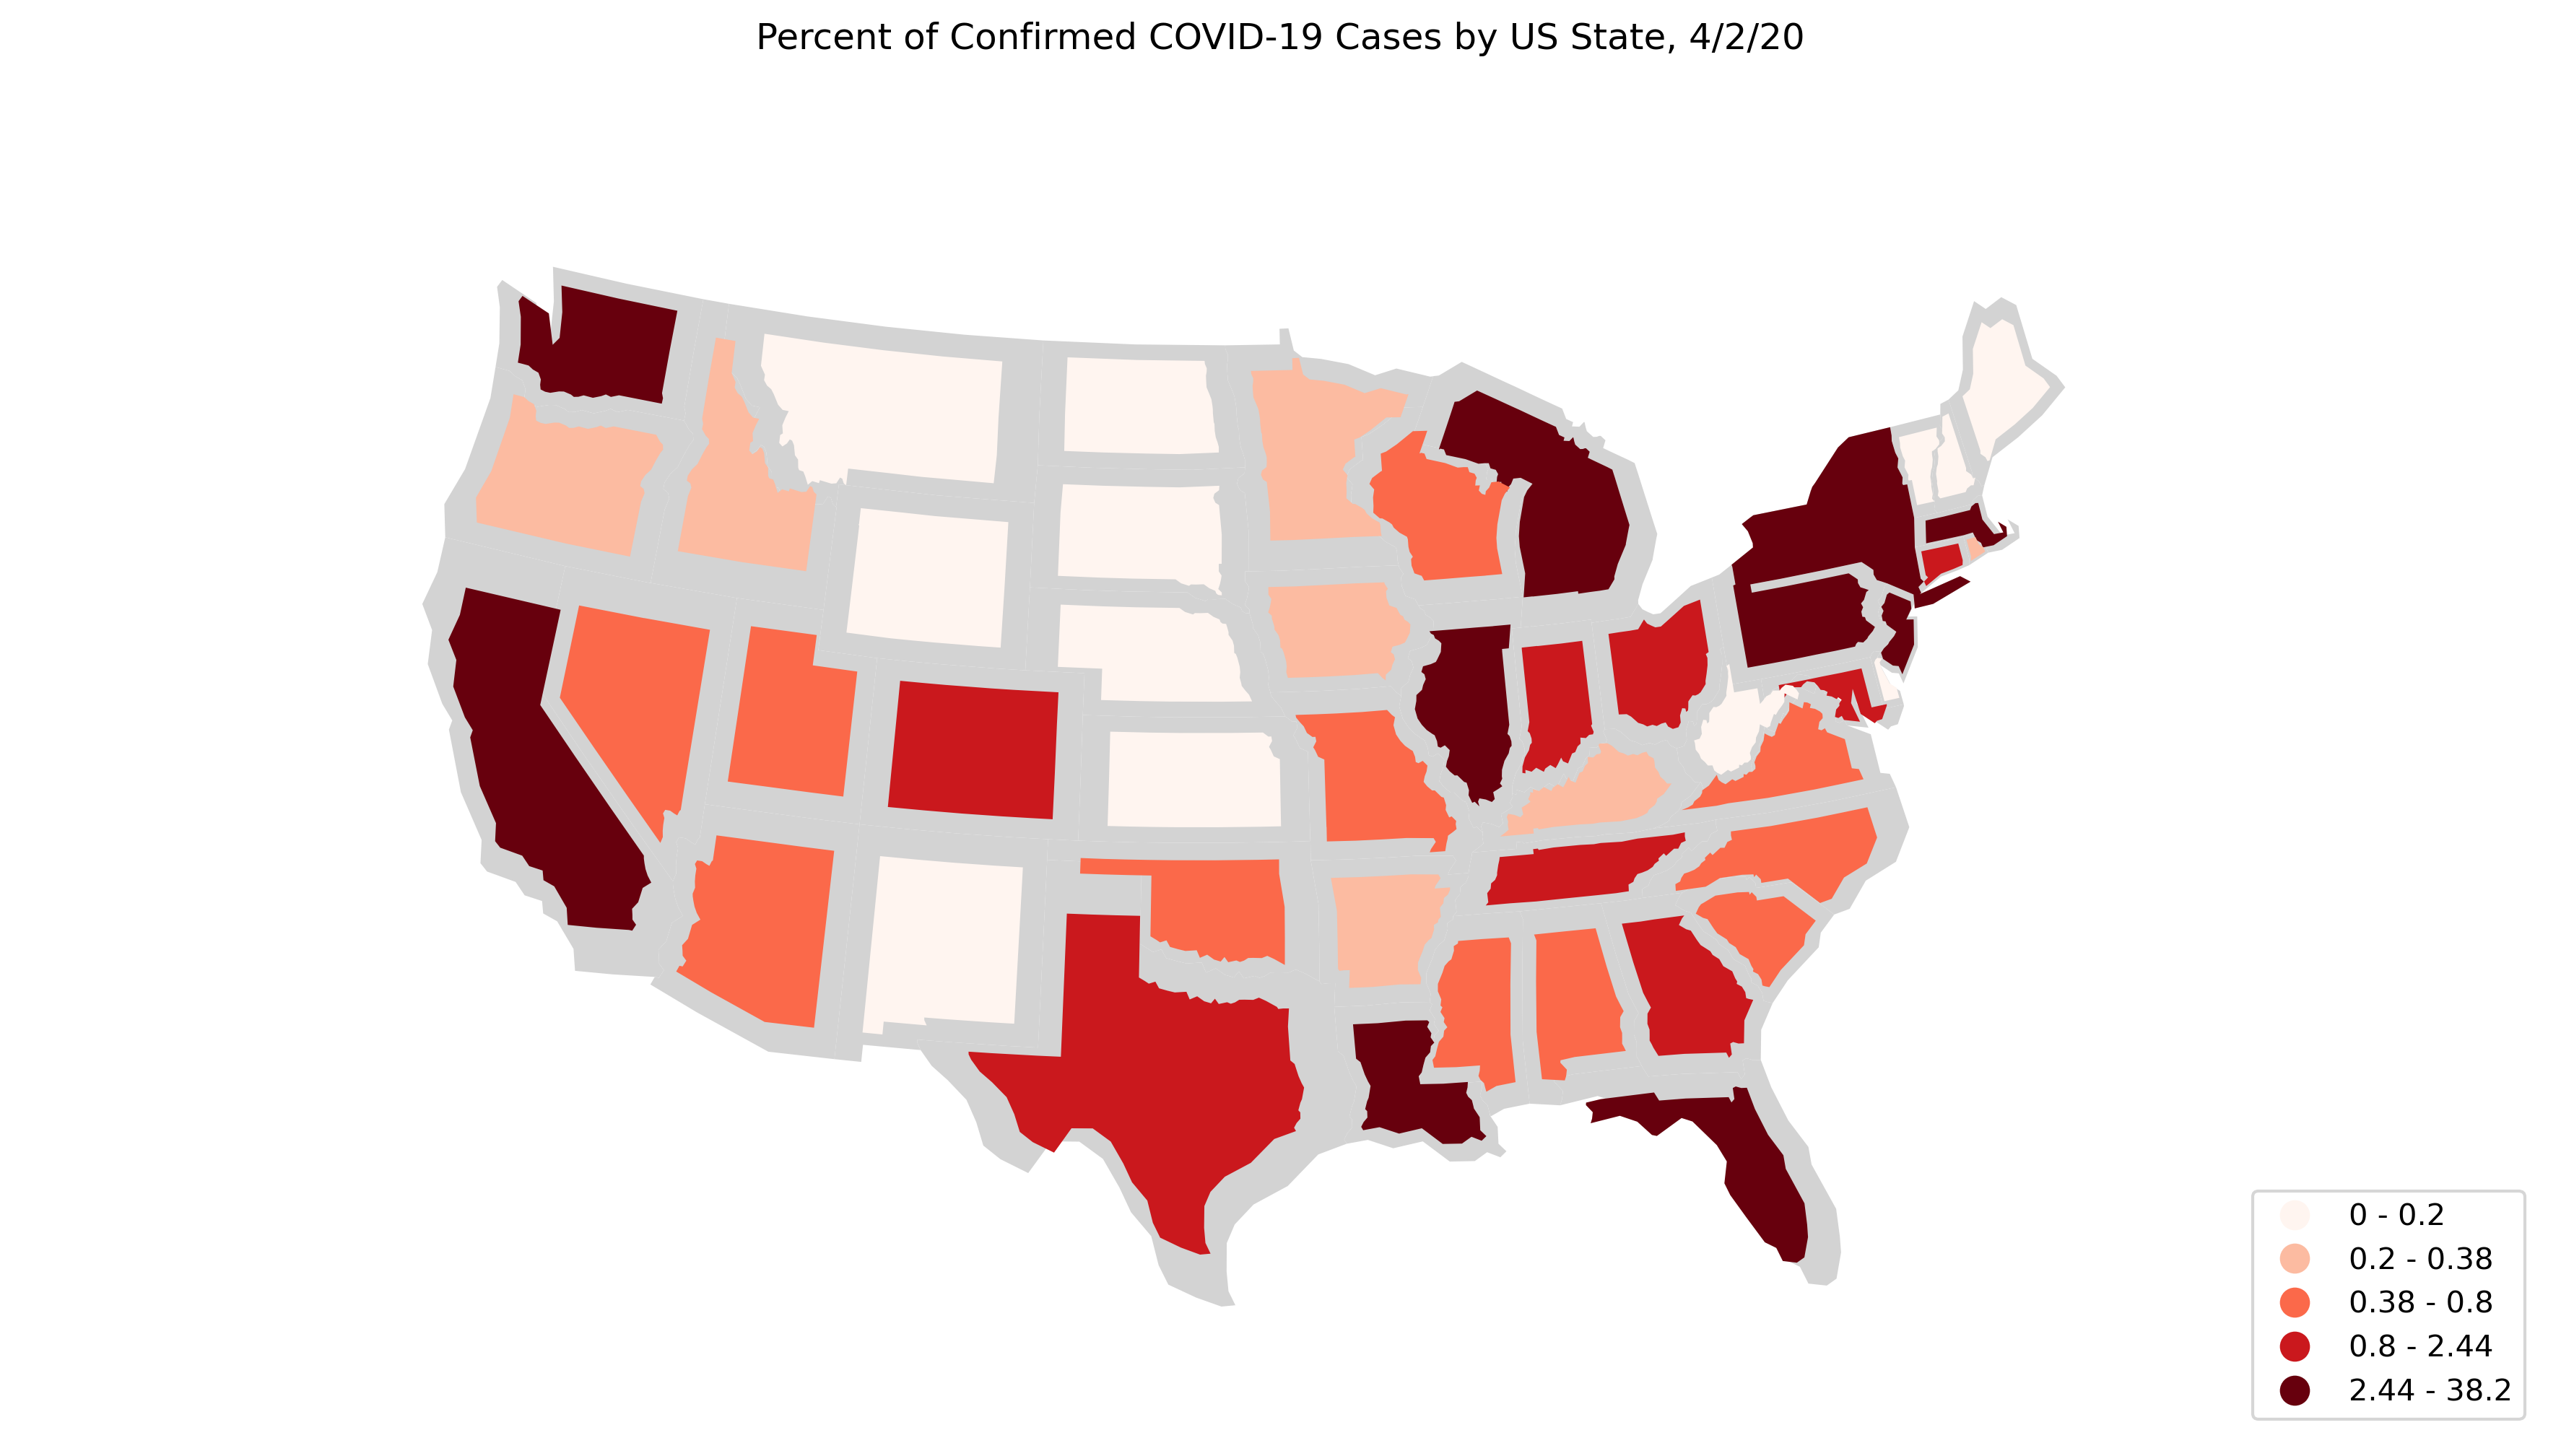

In [31]:
scheme = mc.Quantiles(contiguous_usa['Confirmed Cases Percent'], k=5)
ax = gplt.cartogram(
    contiguous_usa,
    scale='Confirmed Cases Percent', limits=(0.75, 1),
    projection=gcrs.AlbersEqualArea(central_longitude=-98, central_latitude=39.5),
    hue='Confirmed Cases Percent', cmap='Reds', scheme=scheme,
    linewidth=0.5,
    legend=True, legend_kwargs={'loc': 'lower right'}, legend_var='hue',
    figsize=(15, 10)
)
plot = gplt.polyplot(contiguous_usa, facecolor='lightgray', edgecolor='None', ax=ax)

plot.set_title("Percent of Confirmed COVID-19 Cases by US State, %s" %us_confirmed_cases.columns[-1])
plot.figure.set_dpi(300)
plot